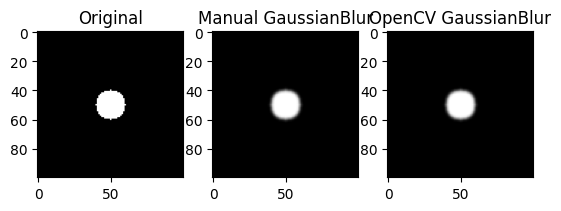

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 生成一个简单的黑白图像
img = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(img, (50, 50), 10, 255, -1)

# 手动定义一个高斯核
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# 创建一个 5x5 的高斯核
kernel = gaussian_kernel(5, 1)

# 应用卷积操作
blurred_img = cv2.filter2D(img, -1, kernel)

# 使用 OpenCV 的 GaussianBlur 进行对比
blurred_img_cv = cv2.GaussianBlur(img, (5, 5), 1)

# 显示图像
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Manual GaussianBlur')
plt.imshow(blurred_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('OpenCV GaussianBlur')
plt.imshow(blurred_img_cv, cmap='gray')

plt.show()
